# Introducción Simple a *pandas* 

**Pandas** es una biblioteca de Python que proporciona herramientas de análisis de datos y estructuras de datos de alto rendimiento y fáciles de usar. Como la biblioteca principal y más completa para estos fines, ** pandas ** es fundamental para el análisis de datos de Python.

Esta introducción está escrita como una alternativa a las presentaciones existentes, como la [introducción de 10 minutos presentada en la documentación oficial] (http://pandas.pydata.org/pandas-docs/stable/10min.html), y está destinada a proporcionar una presentación básica y ágil de las principales herramientas proporcionadas por **pandas**, que cubren la manipulación de datos, la lectura y la visualización, pero también otros comentarios puntuales según sea necesario, como una breve explicación sobre los archivos **.csv**. La introducción supone solo un conocimiento básico de Python.

Comencemos con las importaciones, usaremos más allá de pandas, **numpy**, biblioteca para computación científica y **matplotlib**, biblioteca principal para visualización de datos, sin embargo, como veremos más adelante, pandas nos brinda facilidades con respecto a la visualización de datos, con métodos construidos en matplotlib, también importamos esta biblioteca para que, además de poder modificar estéticamente nuestros gráficos, haga que los gráficos sean más fáciles de mostrar. La línea en línea% matplotlib es parte de la magia de Jupyter y no debes ejecutarla si estás en otro IDE / Entorno.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

Existen dos tipos principales de estruturas de datos en pandas:
 1. **Series** 
 1. **DataFrame**

Una serie es como una matriz unidimensional, una lista de valores. Cada serie tiene un índice, `index`, que etiqueta cada elemento de la lista. A continuación creamos una serie de `notas`, el` índice` de esta Serie es la columna izquierda, que va de 0 a 4 en este caso, que pandas crea automáticamente, ya que no especificamos una lista de etiquetas.

In [2]:
notas = pd.Series([2,7,5,10,6])
notas

0     2
1     7
2     5
3    10
4     6
dtype: int64

Ya podemos verificar aquí los atributos de nuestra Serie, comenzando con los valores y el índice, los dos atributos **fundamentales** en esta estructura:

In [3]:
notas.values

array([ 2,  7,  5, 10,  6], dtype=int64)

In [4]:
notas.index

RangeIndex(start=0, stop=5, step=1)

Debido a que al crear la Serie no proporcionamos un índice específico, pandas utiliza enteros positivos crecientes como valor predeterminado. Puede ser conveniente asignar un índice no estándar, suponiendo que se trata de notas de clase, podríamos utilizar nombres como índice:

In [5]:
notas = pd.Series([2,7,5,10,6], index=["Wilfred", "Abbie", "Harry", "Julia", "Carrie"])
notas

Wilfred     2
Abbie       7
Harry       5
Julia      10
Carrie      6
dtype: int64

Index nos ayuda a hacer referencia a un cierto valor, nos permite acceder a los valores por su etiqueta:

In [6]:
notas["Julia"]

10

Otra facilidad proporcionada por el Dataframe son sus métodos que proporcionan información estadística sobre los valores, como **promedio** `.mean ()` y **desviación estándar** `.std ()`. Recomiendo al lector que investigue y verifique algunos de los métodos y atributos de la estructura usando `TAB` para la finalización automática del shell de Python, o simplemente revise la muy completa [documentación oficial] (https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html#pandas.Series) de este objeto.

In [7]:
print("Média:", notas.mean())
print("Desvio padrão:", notas.std())

Média: 6.0
Desvio padrão: 2.9154759474226504


Por lo general, para resumir brevemente las estadísticas de datos, use `.describe ()`

In [8]:
notas.describe()

count     5.000000
mean      6.000000
std       2.915476
min       2.000000
25%       5.000000
50%       6.000000
75%       7.000000
max      10.000000
dtype: float64

La estructura es lo suficientemente flexible como para aplicar algunas expresiones matemáticas y las funciones matemáticas de numpy directamente:

In [9]:
notas**2

Wilfred      4
Abbie       49
Harry       25
Julia      100
Carrie      36
dtype: int64

In [10]:
np.log(notas)

Wilfred    0.693147
Abbie      1.945910
Harry      1.609438
Julia      2.302585
Carrie     1.791759
dtype: float64

Un DataFrame es una estructura de datos bidimensional, como una hoja de cálculo. A continuación, crearemos un DataFrame que tenga valores de diferentes tipos, utilizando un diccionario como entrada de datos:

In [11]:
df = pd.DataFrame({'Aluno' : ["Wilfred", "Abbie", "Harry", "Julia", "Carrie"],
                   'Faltas' : [3,4,2,1,4],
                   'Prova' : [2,7,5,10,6],
                   'Seminário': [8.5,7.5,9.0,7.5,8.0]})
df

,Aluno,Faltas,Prova,Seminário
0,Wilfred,3,2,8.5
1,Abbie,4,7,7.5
2,Harry,2,5,9.0
3,Julia,1,10,7.5
4,Carrie,4,6,8.0


Los tipos de datos que componen las columnas se pueden verificar con el método `.dtypes`:

In [12]:
df.dtypes

Aluno         object
Faltas         int64
Prova          int64
Seminário    float64
dtype: object

Puede acceder a la lista de columnas de manera muy intuitiva:

In [13]:
df.columns

Index(['Aluno', 'Faltas', 'Prova', 'Seminário'], dtype='object')

Los nombres de columna se pueden usar para acceder a sus valores:

In [14]:
df["Seminário"]

0    8.5
1    7.5
2    9.0
3    7.5
4    8.0
Name: Seminário, dtype: float64

Para DataFrames, `.describe()` tambiém es una buena forma de verificar resumidamente la disposición estadística de los dados numéricos:

In [15]:
df.describe()

,Faltas,Prova,Seminário
count,5.00000,5.000000,5.00000
mean,2.80000,6.000000,8.10000
std,1.30384,2.915476,0.65192
min,1.00000,2.000000,7.50000
25%,2.00000,5.000000,7.50000
50%,3.00000,6.000000,8.00000
75%,4.00000,7.000000,8.50000
max,4.00000,10.000000,9.00000


Otra tarea común aplicada a DataFrames es ordenarlos por una columna dada:

In [16]:
df.sort_values(by="Seminário")

,Aluno,Faltas,Prova,Seminário
1,Abbie,4,7,7.5
3,Julia,1,10,7.5
4,Carrie,4,6,8.0
0,Wilfred,3,2,8.5
2,Harry,2,5,9.0


Tenga en cuenta que el simple uso del método `sort_values` no modifica nuestro DataFrame original:

In [17]:
df

,Aluno,Faltas,Prova,Seminário
0,Wilfred,3,2,8.5
1,Abbie,4,7,7.5
2,Harry,2,5,9.0
3,Julia,1,10,7.5
4,Carrie,4,6,8.0


A menudo necesitamos seleccionar valores específicos de un DataFrame, ya sea una fila o celda específica, y esto se puede hacer de muchas maneras. La documentación oficial contiene [vasta información] (https://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing) para este tipo de tarea, aquí nos centraremos en las formas más comunes de seleccionar datos.

Para seleccionar por índice o etiqueta usamos el atributo `.loc`:

In [18]:
df.loc[3]

Aluno        Julia
Faltas           1
Prova           10
Seminário      7.5
Name: 3, dtype: object

Para seleccionar de acuerdo con criterios condicionales, se usa lo que se llama de **Boolean Indexing**.

Supongamos que solo queremos seleccionar filas donde el valor de la columna *Seminario* esté por encima de 8.0, podemos lograr esto pasando la condición directamente como un índice:

In [19]:
df[df["Seminário"] > 8.0]

,Aluno,Faltas,Prova,Seminário
0,Wilfred,3,2,8.5
2,Harry,2,5,9.0


Este tipo de indexación tambiém posibilita verificar condiciones de múltiples columnas. Diferente de lo que estamos habituados en Python, aqui se usan operadores `bitwise`, o sea, `&`, `|`, `~` en vez de operadores logicos `and`, `or`, `not`, respectivamente. Suponga que además de `df["Seminário"] > 8.0` queremos que el valor de la columna `Prova` no sea menor que 3:

In [20]:
df[(df["Seminário"] > 8.0) & (df["Prova"] > 3)]

,Aluno,Faltas,Prova,Seminário
2,Harry,2,5,9.0


En la sección anterior vimos cómo manipular los datos que se crearon durante esta presentación, sucede que la mayoría de las veces queremos analizar datos que ya están listos y provienen de archivos.
Pandas nos proporciona una serie de características de lectura de datos, para una variedad de formatos de datos estructurales, intente `pd.read_ <TAB>` autocompletado, que incluye:

 1. `pd.read_csv`, para leer arquivos .csv, formato comun para almacenar datos de tablas
 1. `pd.read_xlsx`, para leer arquivos Excel .xlsx, es necesário instalar una biblioteca adicional para esta funcionalidad.
 1. `pd.read_html`, para leer tablas directamente de un website
 
Usaremos para analizar datos externos en esta introducción el `.read_csv`, porque aquí es donde están nuestros datos CSV, o valores separados por comas, es un formato de datos abiertos muy común, como sugiere el acrónimo, estos son valores separados por comas, aunque el carácter separador puede ser un punto y coma u otro.

Cuando el archivo `dados.csv` está en el mismo directorio del script, podemos pasar como argumento de `.read_csv` apenas su nombre. Otro argumento interesante de la función es el `sep`, que por padrón es una coma, pero puede ser definido como otro caracter caso los datos usen otro separador.

Los datos que usaremos como ejemplo son datos sobre precios de apartamentos en 7 barrios de la ciudad de Rio de Janeiro: Botafogo, Copacabana, Gávea, Grajaú, Ipanema, Leblon, Tijuca. Son datos adaptados de un archivo que puede ser encontrado [aqui](https://www.kaggle.com/rbarbera/rio-brasil-modelo-preditivo-precos-imoveis/data).

In [21]:
df = pd.read_csv("https://raw.githubusercontent.com/mruizolazar/DataScience-FPUNA/master/datos/datos_alquiler_Rio-de-Janeiro.csv")
df

,condominio,cuartos,suites,garage,area,barrio,precio,pm2
0,350,1,0.0,1.0,21,Botafogo,340000,16190.48
1,800,1,0.0,1.0,64,Botafogo,770000,12031.25
2,674,1,0.0,1.0,61,Botafogo,600000,9836.07
3,700,1,1.0,1.0,70,Botafogo,700000,10000.00
4,440,1,0.0,1.0,44,Botafogo,515000,11704.55
...,...,...,...,...,...,...,...,...
1992,1080,3,1.0,1.0,80,Tijuca,680000,8500.00
1993,750,3,0.0,1.0,82,Tijuca,650000,7926.83
1994,700,3,1.0,1.0,100,Tijuca,629900,6299.00
1995,1850,3,1.0,2.0,166,Tijuca,1600000,9638.55


Como esperado, el DataFrame tiene muichas líneas de datos, para visualizar resumidamente las primeras líneas de un DataFrame existe el método `.head()`

In [22]:
df.head()

,condominio,cuartos,suites,garage,area,barrio,precio,pm2
0,350,1,0.0,1.0,21,Botafogo,340000,16190.48
1,800,1,0.0,1.0,64,Botafogo,770000,12031.25
2,674,1,0.0,1.0,61,Botafogo,600000,9836.07
3,700,1,1.0,1.0,70,Botafogo,700000,10000.00
4,440,1,0.0,1.0,44,Botafogo,515000,11704.55


Por padrón `.head()` exhibe las 5 primeras líneas, pero eso puede ser alterado:

In [23]:
df.head(n=10)

,condominio,cuartos,suites,garage,area,barrio,precio,pm2
0,350,1,0.0,1.0,21,Botafogo,340000,16190.48
1,800,1,0.0,1.0,64,Botafogo,770000,12031.25
2,674,1,0.0,1.0,61,Botafogo,600000,9836.07
3,700,1,1.0,1.0,70,Botafogo,700000,10000.00
4,440,1,0.0,1.0,44,Botafogo,515000,11704.55
5,917,1,1.0,1.0,60,Botafogo,630000,10500.00
6,850,1,1.0,1.0,65,Botafogo,740000,11384.62
7,350,1,1.0,1.0,43,Botafogo,570000,13255.81
8,440,1,1.0,1.0,26,Botafogo,430000,16538.46
9,510,1,1.0,1.0,42,Botafogo,500000,11904.76


Similarmente existe `.tail()`, que exhibe por padrón las últimas 5 líneas del DataFrame:

In [24]:
df.tail()

,condominio,cuartos,suites,garage,area,barrio,precio,pm2
1992,1080,3,1.0,1.0,80,Tijuca,680000,8500.00
1993,750,3,0.0,1.0,82,Tijuca,650000,7926.83
1994,700,3,1.0,1.0,100,Tijuca,629900,6299.00
1995,1850,3,1.0,2.0,166,Tijuca,1600000,9638.55
1996,800,3,1.0,1.0,107,Tijuca,540000,5046.73


Además se puede verificar la información contenida en el archivo utilizando un método que enumera valores únicos en una columna:

In [25]:
df["barrio"].unique()

array(['Botafogo', 'Copacabana', 'Gávea', 'Grajaú', 'Ipanema', 'Leblon',
       'Tijuca'], dtype=object)

También parece interesante verificar la hegemonía de nuestra muestra en relación con los barrios. Para las tareas de contar valores, siempre podemos aprovechar otro método disponible, el `.value_counts()`, tambiém veremos un poco mas abajo como visualizar estos valores en forma de gráfico de barras.

In [26]:
df["barrio"].value_counts()

Copacabana    346
Tijuca        341
Botafogo      307
Ipanema       281
Leblon        280
Grajaú        237
Gávea         205
Name: barrio, dtype: int64

Los valores contados también se pueden normalizar para expresar porcentajes:

In [27]:
df["barrio"].value_counts(normalize=True)

Copacabana    0.173260
Tijuca        0.170756
Botafogo      0.153731
Ipanema       0.140711
Leblon        0.140210
Grajaú        0.118678
Gávea         0.102654
Name: barrio, dtype: float64

Agrupar datos basados en ciertos criterios es otro proceso que pandas facilita con `.groupby()`.
Este método pode ser usado para resolver los mas **amplios** problemas, aqui un ejemplo de como usar el agrupamento simple, la división de un DataFrame en grupos.

Abajo agrupamos nuestro DataFrame por los valores de la columna `"bairro"`, y luego aplicamos `.mean()` para tener un objeto GroupBy con información de las médias agrupadas por los valores de la columna bairros. 

In [28]:
df.groupby("barrio").mean()

,condominio,cuartos,suites,garage,area,precio,pm2
barrio,,,,,,,
Botafogo,914.475570,2.107492,1.048860,1.159609,83.837134,1.010614e+06,12034.486189
Copacabana,991.861272,2.101156,1.034682,1.080925,101.855491,1.216344e+06,11965.298699
Grajaú,619.940928,2.097046,0.970464,1.130802,79.949367,4.788869e+05,6145.624473
Gávea,985.234146,2.058537,1.029268,1.200000,88.497561,1.454571e+06,16511.582780
Ipanema,1357.120996,2.181495,1.192171,1.220641,100.615658,2.033096e+06,19738.407794
Leblon,1260.010714,2.207143,1.064286,1.164286,91.832143,1.946193e+06,20761.351036
Tijuca,681.175953,2.131965,0.944282,1.143695,81.457478,5.750780e+05,7149.804985


Para extraer datos de una columna de este objeto, simplemente acceda a ella de manera convencional, para obtener los valores del precio promedio del metro cuadrado en orden ascendente, por ejemplo:

In [29]:
df.groupby("barrio").mean()["pm2"].sort_values()

barrio
Grajaú         6145.624473
Tijuca         7149.804985
Copacabana    11965.298699
Botafogo      12034.486189
Gávea         16511.582780
Ipanema       19738.407794
Leblon        20761.351036
Name: pm2, dtype: float64

Podemos aplicar una función cualquiera a los datos, o a una parte de ellos, en este caso pandas ofrece el método `.apply`. Por ejemplo, para dejar los nombres de los barrios con apenas sus tres primeras letras:

In [30]:
def truncar(bairro):
    return bairro[:3]

df["barrio"].apply(truncar)

0       Bot
1       Bot
2       Bot
3       Bot
4       Bot
       ... 
1992    Tij
1993    Tij
1994    Tij
1995    Tij
1996    Tij
Name: barrio, Length: 1997, dtype: object

Otra forma es usar la función lambda:

In [31]:
df["barrio"].apply(lambda x: x[:3])

0       Bot
1       Bot
2       Bot
3       Bot
4       Bot
       ... 
1992    Tij
1993    Tij
1994    Tij
1995    Tij
1996    Tij
Name: barrio, Length: 1997, dtype: object

Una de las tareas en la cual pandas es reconocidamente poderosa es la habilidad de tratar datos incompletos.
Por muchos motivos puede haber datos incompletos en el dataset, `np.nan` es un valor especial definido en Numpy, sigla para Not a Number, pandas completa las células sin valores en un DataFrame usando `np.nan`.

Vamos crear un nuevo dataframe usando las 5 primeras líneas del archivo original, usando `.head()`. Abajo es usado `.replace` para substituir un valor específico por un `NaN`. 

In [32]:
df2 = df.head()
df2 = df2.replace({"pm2": {12031.25: np.nan}})
df2

,condominio,cuartos,suites,garage,area,barrio,precio,pm2
0,350,1,0.0,1.0,21,Botafogo,340000,16190.48
1,800,1,0.0,1.0,64,Botafogo,770000,NaN
2,674,1,0.0,1.0,61,Botafogo,600000,9836.07
3,700,1,1.0,1.0,70,Botafogo,700000,10000.00
4,440,1,0.0,1.0,44,Botafogo,515000,11704.55


Pandas simplifica la remoción de cualquier línea o coluna que posea un `np.nan`, por padrón `.dropna()` retorna las líneas que no contengan un NaN:

In [33]:
df2.dropna()

,condominio,cuartos,suites,garage,area,barrio,precio,pm2
0,350,1,0.0,1.0,21,Botafogo,340000,16190.48
2,674,1,0.0,1.0,61,Botafogo,600000,9836.07
3,700,1,1.0,1.0,70,Botafogo,700000,10000.00
4,440,1,0.0,1.0,44,Botafogo,515000,11704.55


Completar todos los valores NaN por outro valor específico tambiém es bastante simple:

In [34]:
df2.fillna(99)

,condominio,cuartos,suites,garage,area,barrio,precio,pm2
0,350,1,0.0,1.0,21,Botafogo,340000,16190.48
1,800,1,0.0,1.0,64,Botafogo,770000,99.00
2,674,1,0.0,1.0,61,Botafogo,600000,9836.07
3,700,1,1.0,1.0,70,Botafogo,700000,10000.00
4,440,1,0.0,1.0,44,Botafogo,515000,11704.55


Acaba siendo muchas veces conveniente tener un método que indica cuales valores de un dataframe son NaN e cuales no son:

In [35]:
df2.isna()

,condominio,cuartos,suites,garage,area,barrio,precio,pm2
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False


# Visualización de dados com o pandas. 
Los métodos de visualización de pandas están construidos en matplotlib para una rápida exploración de datos. En esta introducción, veremos métodos de visualización incluidos en pandas, que, por otro lado, ofrecen una sintaxis bastante simple para realizar la tarea.

Comencemos verificando que tanto Series como DataFrame poseen un método `.plot()` que tambiém es un atributo y puede ser encadenado para generar visualización de diversos tipos, como histograma, área, pizza y dispersión, usando respectivamente  `.hist()`, `.area()`, `.pie()` y  `.scatter()`, además de vários [outros](https://pandas.pydata.org/pandas-docs/stable/api.html#api-dataframe-plotting).

Vamos verificar la distribución de los precios usando el encadenamiento `.plot.hist()`, el eje x, que es el precio, está en una escala de \*10^7, como mostrado en la imágem:

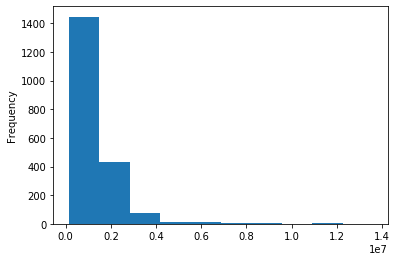

In [36]:
df["precio"].plot.hist()

Por padrón este método usa 10 bins, o sea, divide los datos en 10 partes, pero es claro que podemos especificar un valor para el trazado del gráfico. Abajo, además de especificar la cantidad de bins, tambiém especifique el color de los bordes como negro, ya que por padrón es transparente.

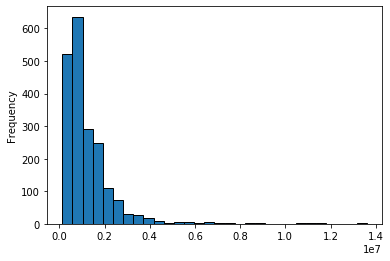

In [37]:
df["precio"].plot.hist(bins=30, edgecolor='black')

Podemos usar los valores de conteo de cada barrio como ejemplo de dato para un plot tanto de barras verticales como de barras horizontales, para verificar visualmente estos datos:

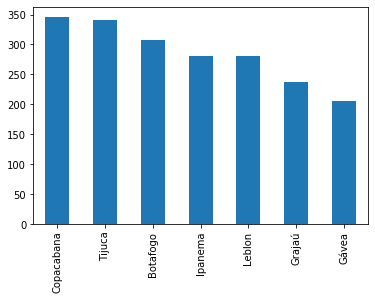

In [38]:
df["barrio"].value_counts().plot.bar()

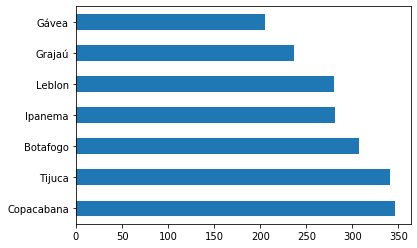

In [39]:
df["barrio"].value_counts().plot.barh()

Los métodos son suficientemente flexíbles para aceptar argumentos como un título para la imagem:

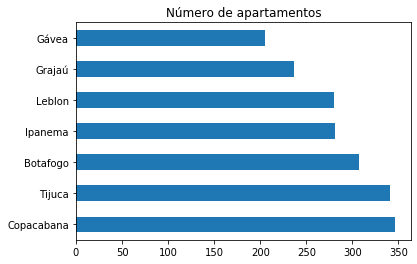

In [40]:
df["barrio"].value_counts().plot.barh(title="Número de apartamentos")

Se puede usar un diagrama de dispersión usando un DataFrame especificando qué columnas usar como datos en los ejes x e y:

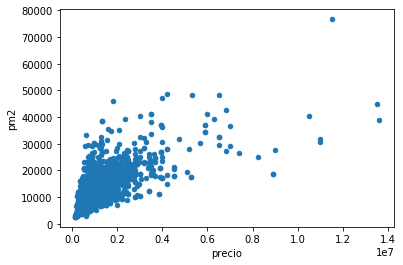

In [41]:
df.plot.scatter(x='precio', y='pm2')

Con fines estéticos, matplotlib proporciona varios estilos diferentes que se pueden usar, uno de los cuales es ggplot.

In [42]:
plt.style.use('ggplot')

Este estilo ahora se usará para todas las imágenes generadas después de esta línea.

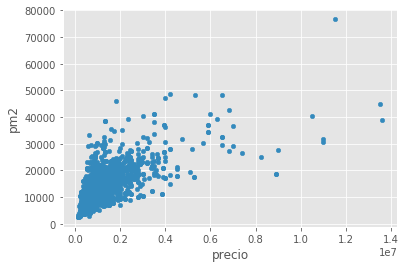

In [43]:
df.plot.scatter(x='precio', y='pm2')

La lista de estilos disponíbles puede ser vista a través de un método propio

In [44]:
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

La columna de cuartos le indica cuántas habitaciones tiene un apartamento en particular, también puede ver el recuento y la distribución utilizando otros métodos de trazado que ofrece pandas:

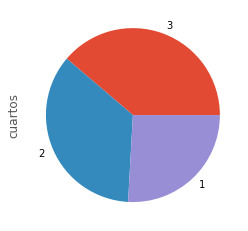

In [45]:
df["cuartos"].value_counts().plot.pie()

Una cosa a tener en cuenta sobre el gráfico de dispersión es la contaminación causada por la gran cantidad de datos agrupados en una esquina del gráfico, y podemos reducir el tamaño de los puntos al pasar el argumento `s` al método `.scatter`, también podemos usar un método de pandas que crea un muestreo aleatorio de datos.

El método `.sample` puede recebir tanto un argumento `frac`, que determina una fracción de los itens que el método retornará (en el caso abajo, 10%), o `n`, que determina un valor absoluto de itens.

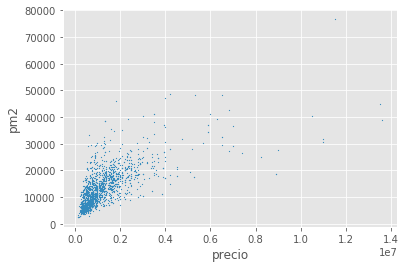

In [46]:
df.plot.scatter(x='precio', y='pm2', s=.5)

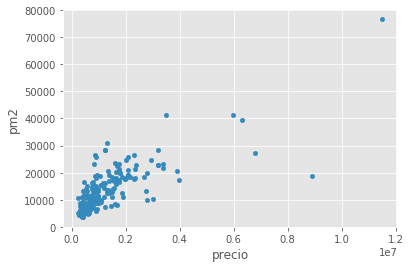

In [47]:
df.sample(frac=.1).plot.scatter(x='precio', y='pm2')

Finalmente, la tarea de salvar su DataFrame externamente para un formato específico es realizada con la misma simplicidad que la lectura de datos es realizada en pandas, se puede usar, por ejemplo, el método `to_csv`, y el archivo será creado con los datos del DataFrame:

In [48]:
df = pd.DataFrame({'Aluno' : ["Wilfred", "Abbie", "Harry", "Julia", "Carrie"],
                   'Faltas' : [3,4,2,1,4],
                   'Prova' : [2,7,5,10,6],
                   'Seminário': [8.5,7.5,9.0,7.5,8.0]})
df.to_csv("aulas.csv")

In [49]:
pd.read_csv("aulas.csv")

,Unnamed: 0,Aluno,Faltas,Prova,Seminário
0,0,Wilfred,3,2,8.5
1,1,Abbie,4,7,7.5
2,2,Harry,2,5,9.0
3,3,Julia,1,10,7.5
4,4,Carrie,4,6,8.0


Con lo que se cubrió en esta introducción, ya debería poder realizar una exploración básica y la manipulación de datos con **pandas**, para profundizar mas aqui están algunas referencias:

 - [Documentacion oficial](http://pandas.pydata.org/pandas-docs/stable/index.html)